In [1]:
import importlib
import pandas as pd
import functions_project2
importlib.reload(functions_project2)
import re
from functions_project2 import read_clean_file, date_clean_up
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "/Users/adolfoartolamadrigal/Documents/Irohacks/Project/Project2/Base_Project-2.xlsx"
df = read_clean_file(path)

/Users/adolfoartolamadrigal/Documents/Irohacks/Project/Project2/functions_project2.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.replace("..",0,inplace=True)


In [3]:
date_clean_up(df)
df.rename(columns={"Combined Sales of the 10 Largest Chaebol (as percentage ofGNP)": "Combined Sales of the 10 Largest Chaebol"}, inplace=True)
df = df[["Series Name","GDP (constant LCU)","Combined Sales of the 10 Largest Chaebol","Exports of goods and services (current LCU) Expressed as % of GDP","Government expenditure on education, total (% of GDP)","Population Total","Population Annual Growth Expressed (%)","Gross domestic savings (Expressed as a % of GDP)"]]
df['GDP Growth (%)'] = (df['GDP (constant LCU)'] / df['GDP (constant LCU)'].shift(1) - 1)
df['GDP Growth (%)'].fillna(0,inplace=True)
df["Government expenditure on education, total (% of GDP)"] = df["Government expenditure on education, total (% of GDP)"]/100
df["Exports of goods and services"] = df["Exports of goods and services (current LCU) Expressed as % of GDP"] * df["GDP (constant LCU)"]
df["Government expenditure on education"] = df["Government expenditure on education, total (% of GDP)"]* df["GDP (constant LCU)"]

df = df.loc[df["Series Name"]>1969]
df_melted = df.melt(id_vars=["Series Name"], value_vars=["GDP (constant LCU)", "Combined Sales of the 10 Largest Chaebol"],
                    var_name="Indicator", value_name="Wons")
df_melted


/var/folders/6g/dhv5ylld76zgp_63c85rplcc0000gn/T/ipykernel_26217/2679154570.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GDP Growth (%)'].fillna(0,inplace=True)


,Series Name,Indicator,Wons
0,1970,GDP (constant LCU),6.765000e+13
1,1971,GDP (constant LCU),7.472260e+13
2,1972,GDP (constant LCU),8.006580e+13
3,1973,GDP (constant LCU),9.193760e+13
4,1974,GDP (constant LCU),1.006357e+14
...,...,...,...
93,2014,Combined Sales of the 10 Largest Chaebol,1.531457e+15
94,2015,Combined Sales of the 10 Largest Chaebol,1.508209e+15
95,2016,Combined Sales of the 10 Largest Chaebol,1.518696e+15
96,2017,Combined Sales of the 10 Largest Chaebol,1.624512e+15


<Axes: xlabel='Series Name', ylabel='Wons'>

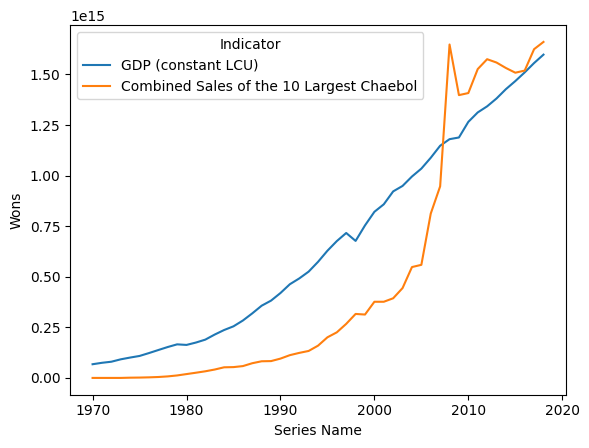

In [5]:
sns.lineplot(df_melted,x = "Series Name", y = "Wons", hue = "Indicator",markers = True)


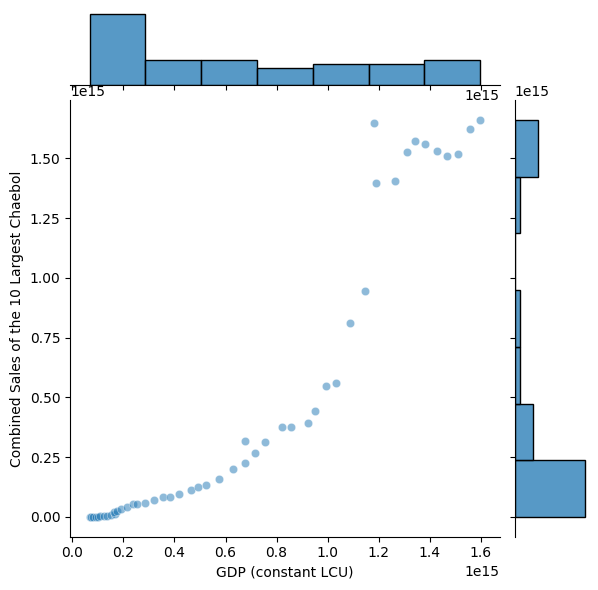

In [5]:
sns.jointplot(data = df,x= "GDP (constant LCU)", y= "Combined Sales of the 10 Largest Chaebol",alpha = 0.5)

<Axes: xlabel='0', ylabel='0'>

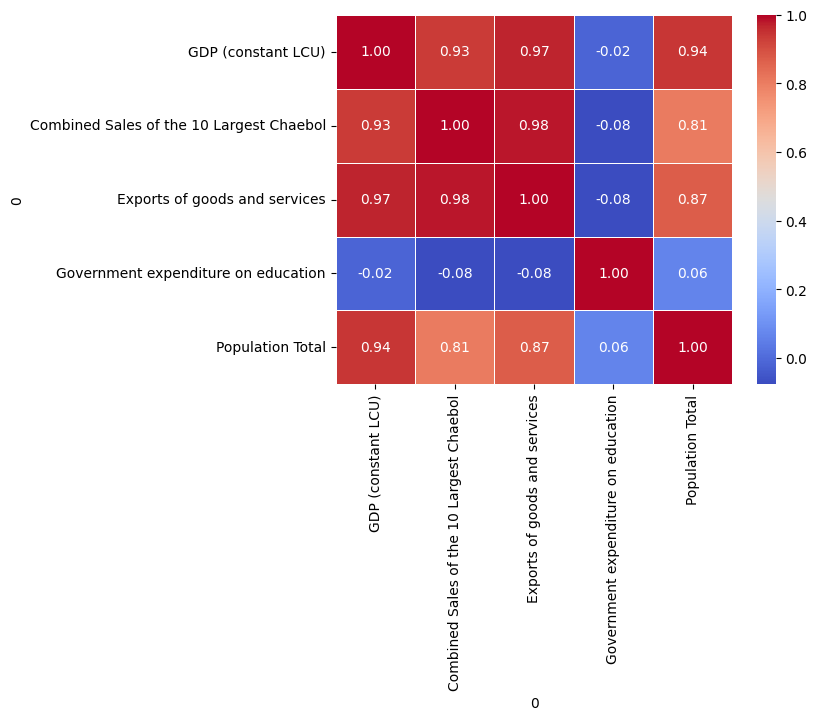

In [19]:
df_visual = df[["GDP (constant LCU)","Combined Sales of the 10 Largest Chaebol","Exports of goods and services","Government expenditure on education","Population Total"]]
corr = df_visual.corr()
corr.style.background_gradient(cmap='coolwarm')

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

### MODELING AND SPLITTING DATA // TRAINING MODEL

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import math

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Assuming your dataframe is called df and your features and target are defined
x = df[["Combined Sales of the 10 Largest Chaebol", "Exports of goods and services", 
        "Government expenditure on education", "Population Total"]]
y = df["GDP (constant LCU)"]

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=42)

# Add a constant (intercept) to the model
x_train_with_const = sm.add_constant(x_train)

# Fit the OLS model using statsmodels
ols_model = sm.OLS(y_train, x_train_with_const).fit()

# Get the summary which includes coefficients, standard errors, t-stats, and p-values
summary = ols_model.summary()

# Print the model summary
print(summary)

# You can also extract individual elements (e.g., coefficients, standard errors) if you need them:
coefficients = ols_model.params.round(2)
standard_errors = ols_model.bse.round(2)
t_stats = ols_model.tvalues.round(2)
p_values = ols_model.pvalues.round(4)

# Create a DataFrame to show these statistics
stat_df = pd.DataFrame({
    "Coef": coefficients,
    "Std Error": standard_errors,
    "T-Stat": t_stats,
    "P-Value": p_values
})

# Set the variable names as the index
stat_df.index.name = "Variable"

# Display the dataframe
stat_df


                            OLS Regression Results                            
Dep. Variable:     GDP (constant LCU)   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     66.36
Date:                Thu, 21 Nov 2024   Prob (F-statistic):           6.64e-07
Time:                        12:22:15   Log-Likelihood:                -471.47
No. Observations:                  14   AIC:                             950.9
Df Residuals:                      10   BIC:                             953.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

/Users/adolfoartolamadrigal/Library/Python/3.9/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  res = hypotest_fun_out(*samples, **kwds)


,Coef,Std Error,T-Stat,P-Value
Variable,,,,
const,0.11,0.06,1.80,0.1022
Combined Sales of the 10 Largest Chaebol,-0.11,0.25,-0.42,0.6802
Exports of goods and services,2.02,0.65,3.12,0.0108
Government expenditure on education,0.70,5.64,0.12,0.9034
Population Total,4165849.86,2315805.13,1.80,0.1022


In [8]:
x = df[["Combined Sales of the 10 Largest Chaebol","Exports of goods and services","Government expenditure on education","Population Total"]]
y = df["GDP (constant LCU)"]
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.7,random_state=42)
lm = LinearRegression()
lm.fit(x_train,y_train)
lm.coef_
cdf = pd.DataFrame((lm.coef_).round(2),x.columns, columns=["coef"])
cdf.index.name = "Variable"
cdf

,coef
Variable,
Combined Sales of the 10 Largest Chaebol,0.02
Exports of goods and services,0.57
Government expenditure on education,-7.58
Population Total,63484404.84


### CREATE PREDICITON

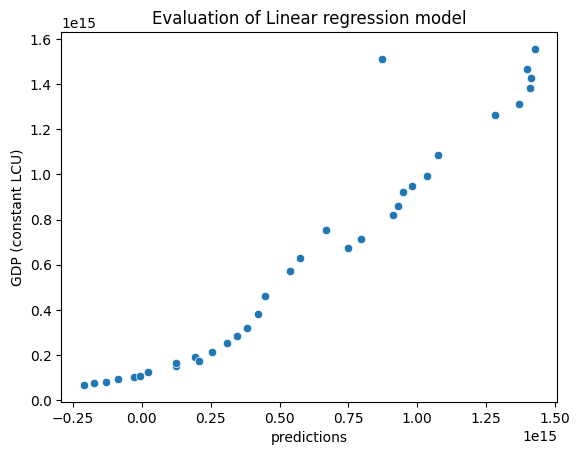

In [9]:
predictions = lm.predict(x_test)
sns.scatterplot(x = predictions, y = y_test)
plt.xlabel("predictions")
plt.title("Evaluation of Linear regression model")
plt.show()

In [10]:
x.describe()

Variable,Combined Sales of the 10 Largest Chaebol,Exports of goods and services,Government expenditure on education,Population Total
count,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01
mean,4.879447e+14,2.628160e+14,6.968481e+12,4.367424e+07
std,6.092898e+14,2.508813e+14,1.163460e+13,5.757719e+06
min,0.000000e+00,7.743393e+12,0.000000e+00,3.224083e+07
25%,3.275055e+13,5.235528e+13,0.000000e+00,3.932635e+07
50%,1.593731e+14,1.390841e+14,2.470299e+12,4.464154e+07
75%,8.120891e+14,4.043230e+14,1.042797e+13,4.843829e+07
max,1.660329e+15,7.560671e+14,6.936373e+13,5.160663e+07


In [15]:
print("mean absolute error", mean_absolute_error(y_test,predictions))
print("r2 score",r2_score(y_test,predictions))
print("mean square error", mean_squared_error(y_test, predictions))
print("RMSE", math.sqrt(mean_squared_error(y_test,predictions)))

mean absolute error 90988544066714.77
r2 score 0.9130026551797724
mean square error 2.1215870485614216e+28
RMSE 145656687061096.56


### RESIDUALS

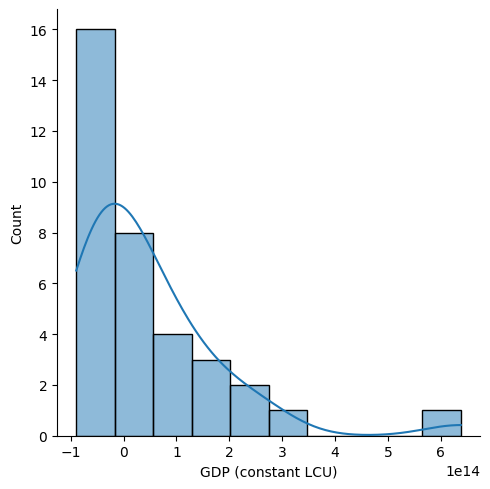

In [12]:
residuals = y_test-predictions
sns.displot(residuals, bins = 10, kde = True)

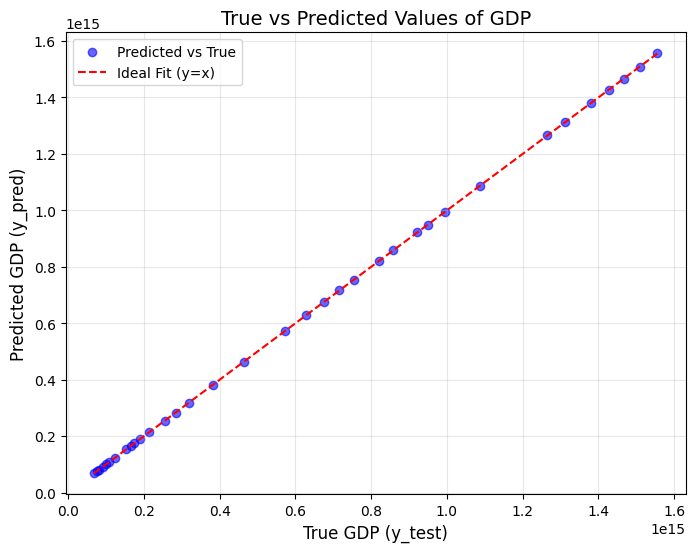

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, color="blue", alpha=0.6, label="Predicted vs True")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Ideal Fit (y=x)")

# Add titles and labels
plt.title("True vs Predicted Values of GDP", fontsize=14)
plt.xlabel("True GDP (y_test)", fontsize=12)
plt.ylabel("Predicted GDP (y_pred)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

# Show the plot
plt.show()

In [23]:
import statsmodels.api as sm
import pandas as pd

# Define the independent variables (x) and the dependent variable (y)
x = df[["Combined Sales of the 10 Largest Chaebol", 
        "Exports of goods and services", 
        "Government expenditure on education", 
        "Population Total"]]
y = df["GDP (constant LCU)"]

# Add a constant term to the independent variables for the intercept
x = sm.add_constant(x)

# Fit the OLS regression model
model = sm.OLS(y, x).fit()

# Get the summary of the regression results
summary = model.summary2().tables[1]

# The summary contains all the statistical data you need
# Rename the columns to make them clear
summary_df = summary[['Coef.', 'Std.Err.', 't', 'P>|t|']]

# Rename the columns for clarity
summary_df.columns = ['Coefficient', 'Standard Error', 'T-stat', 'P-Value']

# Apply styling to make the table more appealing
styled_df = summary_df.style.format({
    'Coefficient': '{:.4f}',       # Round coefficients to 4 decimal places
    'Standard Error': '{:.4f}',    # Round standard errors to 4 decimal places
    'T-stat': '{:.2f}',            # Round t-stats to 2 decimal places
    'P-Value': '{:.4f}'            # Round p-values to 4 decimal places
})

# Highlight p-values < 0.05 in bold and light green
styled_df = styled_df.applymap(lambda v: 'font-weight: bold; color: green' if isinstance(v, (int, float)) and v < 0.05 else '', subset=['P-Value'])

# Add a border around the table for better visibility
styled_df = styled_df.set_table_styles(
    [{'selector': 'th', 'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold')]},   # Header styling
     {'selector': 'td', 'props': [('border', '1px solid black'), ('padding', '5px')]},                               # Table cells styling
     {'selector': 'table', 'props': [('border-collapse', 'collapse')]},                                               # Table border collapse
    ])

# Display the styled dataframe
styled_df


/var/folders/6g/dhv5ylld76zgp_63c85rplcc0000gn/T/ipykernel_24469/1506282527.py:36: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = styled_df.applymap(lambda v: 'font-weight: bold; color: green' if isinstance(v, (int, float)) and v < 0.05 else '', subset=['P-Value'])


,Coefficient,Standard Error,T-stat,P-Value
const,0.0824,0.0238,3.46,0.0012
Combined Sales of the 10 Largest Chaebol,-0.3141,0.1446,-2.17,0.0351
Exports of goods and services,2.5843,0.3663,7.06,0.0000
Government expenditure on education,1.9348,1.3780,1.40,0.1672
Population Total,3008067.9228,870568.7852,3.46,0.0012


**Coefficient**eans that for every one additional person in the population, the model predicts an increase in GDP of 3008067.

**Standard error**: it indicates that the estimate of the coefficient is precise. In other words, the coefficient is not likely to change much if we used a different 
sample from the same population.

**t-test** telling you whether each individual predictor (e.g., "Combined Sales of the 10 Largest Chaebol") significantly contributes to predicting GDP. If the t-value is large (e.g., >2), you can conclude that "Combined Sales of the 10 Largest Chaebol" is significantly related to GDP.

**R2** After fitting the model, you get an R-squared value, say 0.85. This means 85% of the variation in GDP is explained by all of the independent variables (the combined effect of Sales, Exports, Education, and Population). The higher the R-squared, the better the model fits the data overall.

**p-value** p-value tells you whether the relationship between an independent variable and the dependent variable is likely to be real or just due to random chance. hat helps you decide whether to reject or fail to reject the null hypothesis .t tests whether the coefficient of a predictor is significantly different from zero.

1. Small p-value (< 0.05): Indicates that the independent variable has a significant relationship with the dependent variable. In other words, you can reject the null hypothesis (which states there is no effect)
2. Large p-value (≥ 0.05): Suggests that the relationship between the variable and the outcome is not significant, and you fail to reject the null hypothesis. 
